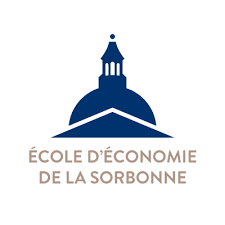

# Event Study Application: 
## Impact of the Inflation Reduction Actapproval on United States Stock Market

- #### Camilo Saldarriaga

* [1. Importing data](#chapter1)

* [2. Data preparation](#chapter2)
    * [2.1 Merging data](#section_2_1)
    * [2.2 Creating the dummy variables](#section_2_2)
    * [2.3 Log transformation](#section_2_3)
* [3. Descriptive statistics](#chapter3)
* [4. Mean adjusted return model for market portfolio after the events](#chapter4)
* [5. Market Return model after for ^ECO index and S&P 500 Automotive industry group](#chapter5)

In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import datetime as dt
import statsmodels.api as sm
import yfinance as yfin
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
import pandas as pd
import yfinance as yfin
from pandas_datareader import data as pdr
import datetime as dt
import matplotlib.pyplot as plt

import seaborn as sns

import matplotlib.pyplot as plt 
import numpy as np 
import math 

## 1. Importing data<a id="chapter1"></a>

First I define the dates for the analysis

In [3]:
start = dt.date(2017,12,31)
end = dt.date(2022,12,31)

I import the files for the indexes and the Risk Market Premium

In [4]:
RF = pd.read_csv("F-F_Research_Data_Factors_daily.csv")[["Date", "Mkt-RF", "RF"]]
RF["Mkt"] = RF["Mkt-RF"] + RF["RF"]
RF["Mkt"]= RF["Mkt"]/100
RF 

,Date,Mkt-RF,RF,Mkt
0,19260701,0.10,0.009,0.00109
1,19260702,0.45,0.009,0.00459
2,19260706,0.17,0.009,0.00179
3,19260707,0.09,0.009,0.00099
4,19260708,0.21,0.009,0.00219
...,...,...,...,...
25603,20231025,-1.58,0.021,-0.01559
25604,20231026,-1.15,0.021,-0.01129
25605,20231027,-0.53,0.021,-0.00509
25606,20231030,1.15,0.021,0.01171


In [5]:
RF["Date"] = pd.to_datetime(RF["Date"], format ="%Y%m%d").dt.strftime("%Y-%m-%d")

RF

,Date,Mkt-RF,RF,Mkt
0,1926-07-01,0.10,0.009,0.00109
1,1926-07-02,0.45,0.009,0.00459
2,1926-07-06,0.17,0.009,0.00179
3,1926-07-07,0.09,0.009,0.00099
4,1926-07-08,0.21,0.009,0.00219
...,...,...,...,...
25603,2023-10-25,-1.58,0.021,-0.01559
25604,2023-10-26,-1.15,0.021,-0.01129
25605,2023-10-27,-0.53,0.021,-0.00509
25606,2023-10-30,1.15,0.021,0.01171


Now, I import the ^ECO index

In [6]:
ECO = pd.read_csv("ECO index .csv")
ECO

,Date,^ECO
0,1/2/2018 16:00,53.91
1,1/3/2018 16:00,53.88
2,1/4/2018 16:00,53.80
3,1/5/2018 16:00,53.79
4,1/8/2018 16:00,53.87
...,...,...
1153,12/23/2022 16:00,80.47
1154,12/27/2022 16:00,77.00
1155,12/28/2022 16:00,76.02
1156,12/29/2022 16:00,79.23


In [7]:
pd.to_datetime(ECO["Date"], format = "%m/%d/%Y %H:%M")

0      2018-01-02 16:00:00
1      2018-01-03 16:00:00
2      2018-01-04 16:00:00
3      2018-01-05 16:00:00
4      2018-01-08 16:00:00
               ...        
1153   2022-12-23 16:00:00
1154   2022-12-27 16:00:00
1155   2022-12-28 16:00:00
1156   2022-12-29 16:00:00
1157   2022-12-30 16:00:00
Name: Date, Length: 1158, dtype: datetime64[ns]

In [8]:
ECO["Date"]= pd.to_datetime(ECO["Date"], format = "%m/%d/%Y %H:%M").dt.strftime("%Y-%m-%d")
ECO

,Date,^ECO
0,2018-01-02,53.91
1,2018-01-03,53.88
2,2018-01-04,53.80
3,2018-01-05,53.79
4,2018-01-08,53.87
...,...,...
1153,2022-12-23,80.47
1154,2022-12-27,77.00
1155,2022-12-28,76.02
1156,2022-12-29,79.23


Now, I import the "^SP500-251020" Ticker.

In [9]:
tickers = ["^SP500-251020"]

In [10]:
yfin.pdr_override()

elec_v_prices = pdr.get_data_yahoo(tickers, start, end)["Adj Close"]
elec_v_prices = pd.DataFrame(elec_v_prices)
elec_v_prices.reset_index(inplace = True)
elec_v_prices

[*********************100%%**********************]  1 of 1 completed


,Date,Adj Close
0,2018-01-02,112.620003
1,2018-01-03,114.000000
2,2018-01-04,116.709999
3,2018-01-05,117.410004
4,2018-01-08,117.580002
...,...,...
1246,2022-12-23,56.040001
1247,2022-12-27,50.869999
1248,2022-12-28,51.869999
1249,2022-12-29,55.630001


In [11]:
elec_v_prices.rename(columns={"Adj Close": "^SP500-251020"}, inplace = True )

# 2. Data preparation<a id="chapter2"></a>

## 2.1 Merging data <a id="section_2_1"></a>

In [12]:
RF["Date"] = pd.to_datetime(RF["Date"])
ECO["Date"] = pd.to_datetime(ECO["Date"])
elec_v_prices["Date"] = pd.to_datetime(elec_v_prices["Date"])

In [13]:
elec_v_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1251 non-null   datetime64[ns]
 1   ^SP500-251020  1251 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.7 KB


In [14]:
DF1 =pd.merge(ECO, RF , how ="inner", on = "Date")
DF1

,Date,^ECO,Mkt-RF,RF,Mkt
0,2018-01-02,53.91,0.85,0.006,0.00856
1,2018-01-03,53.88,0.59,0.006,0.00596
2,2018-01-04,53.80,0.42,0.006,0.00426
3,2018-01-05,53.79,0.66,0.006,0.00666
4,2018-01-08,53.87,0.19,0.006,0.00196
...,...,...,...,...,...
1153,2022-12-23,80.47,0.51,0.016,0.00526
1154,2022-12-27,77.00,-0.51,0.016,-0.00494
1155,2022-12-28,76.02,-1.23,0.016,-0.01214
1156,2022-12-29,79.23,1.87,0.016,0.01886


In [15]:
DF2 =pd.merge(DF1, elec_v_prices , how ="inner", on = "Date")
DF2

,Date,^ECO,Mkt-RF,RF,Mkt,^SP500-251020
0,2018-01-02,53.91,0.85,0.006,0.00856,112.620003
1,2018-01-03,53.88,0.59,0.006,0.00596,114.000000
2,2018-01-04,53.80,0.42,0.006,0.00426,116.709999
3,2018-01-05,53.79,0.66,0.006,0.00666,117.410004
4,2018-01-08,53.87,0.19,0.006,0.00196,117.580002
...,...,...,...,...,...,...
1145,2022-12-23,80.47,0.51,0.016,0.00526,56.040001
1146,2022-12-27,77.00,-0.51,0.016,-0.00494,50.869999
1147,2022-12-28,76.02,-1.23,0.016,-0.01214,51.869999
1148,2022-12-29,79.23,1.87,0.016,0.01886,55.630001


## 2.2 Creating the dummy variables <a id="section_2_2"></a>

First, I create the dummies for the analysis of the impact after the event, where:

- D1 corresponds to the bill presentation
- D2 corresponds to the announcement of Senator's Manchin opposition to the bill 
- D3 corresponds to the agreement with Senator Manchin
- D4 corresponds to the Senate approval of the bill

In [16]:
DF2["sept_23_to_sept_29_2021"] = 0
DF2["dec_16_to_dec_22_2021"] = 0
DF2["jul_25_to_jul_29_2022"] = 0
DF2["aug_04_to_aug_10_2022"] = 0

mask1 = ((DF2["Date"]=="2021-09-23") | (DF2["Date"]=="2021-09-24") | (DF2["Date"]=="2021-09-27") | (DF2["Date"]=="2021-09-28") | (DF2["Date"]=="2021-09-29") )
mask2 = ((DF2["Date"]=="2021-12-16") | (DF2["Date"]=="2021-12-17") | (DF2["Date"]=="2021-12-20") | (DF2["Date"]=="2021-12-21") | (DF2["Date"]=="2021-12-22") )
mask3 = ((DF2["Date"]=="2022-07-25") | (DF2["Date"]=="2022-07-26") | (DF2["Date"]=="2022-07-27") | (DF2["Date"]=="2022-07-28") | (DF2["Date"]=="2022-07-29") )
mask4 = ((DF2["Date"]=="2022-08-04") | (DF2["Date"]=="2022-08-05") | (DF2["Date"]=="2022-08-08") | (DF2["Date"]=="2022-08-09") | (DF2["Date"]=="2022-08-10") )

DF2.loc[mask1, "sept_23_to_sept_29_2021"] = 1
DF2.loc[mask2, "dec_16_to_dec_22_2021"] = 1
DF2.loc[mask3, "jul_25_to_jul_29_2022"] = 1
DF2.loc[mask4, "aug_04_to_aug_10_2022"] = 1


print(DF2["sept_23_to_sept_29_2021"].value_counts())
print(DF2["dec_16_to_dec_22_2021"].value_counts())
print(DF2["jul_25_to_jul_29_2022"].value_counts())
print(DF2["aug_04_to_aug_10_2022"].value_counts())

sept_23_to_sept_29_2021
0    1145
1       5
Name: count, dtype: int64
dec_16_to_dec_22_2021
0    1145
1       5
Name: count, dtype: int64
jul_25_to_jul_29_2022
0    1145
1       5
Name: count, dtype: int64
aug_04_to_aug_10_2022
0    1145
1       5
Name: count, dtype: int64


DF2["D1"] = 0
DF2["D2"] = 0
DF2["D3"] = 0
DF2["D4"] = 0

mask1 = ((DF2["Date"]=="2021-09-23") | (DF2["Date"]=="2021-09-24") | (DF2["Date"]=="2021-09-27") | (DF2["Date"]=="2021-09-28") | (DF2["Date"]=="2021-09-29") )
mask2 = ((DF2["Date"]=="2021-12-16") | (DF2["Date"]=="2021-12-17") | (DF2["Date"]=="2021-12-20") | (DF2["Date"]=="2021-12-21") | (DF2["Date"]=="2021-12-22") )
mask3 = ((DF2["Date"]=="2022-07-25") | (DF2["Date"]=="2022-07-22") | (DF2["Date"]=="2022-07-27") | (DF2["Date"]=="2022-07-28") | (DF2["Date"]=="2022-07-29") )
mask4 = ((DF2["Date"]=="2022-08-04") | (DF2["Date"]=="2022-08-15") | (DF2["Date"]=="2022-08-08") | (DF2["Date"]=="2022-08-09") | (DF2["Date"]=="2022-08-10") )

DF2.loc[mask1, 'D1'] = 1
DF2.loc[mask2, 'D2'] = 1
DF2.loc[mask3, 'D3'] = 1
DF2.loc[mask4, 'D4'] = 1


print(DF2["D1"].value_counts())
print(DF2["D2"].value_counts())
print(DF2["D3"].value_counts())
print(DF2["D4"].value_counts())


## 2.3 Calculating returns <a id="section_2_3"></a>

To obtain the returns of the ECO Index and the S&P 500 Automobiles Industry index, I apply the log transformation and then obtain the first differences.

In [17]:
DF2["ln_^ECO"] = np.log(DF2["^ECO"])
DF2["^SP500-251020"] = np.log(DF2["^SP500-251020"])

DF2["Ret_^ECO"] = DF2["ln_^ECO"].diff() 
DF2["Ret_^SP500-251020"] = DF2["^SP500-251020"].diff() 

DF2["Mkt"] = DF2["Mkt"] 

DF2.drop(0, inplace = True)


# 3. Descriptive statistics <a id="chapter3">

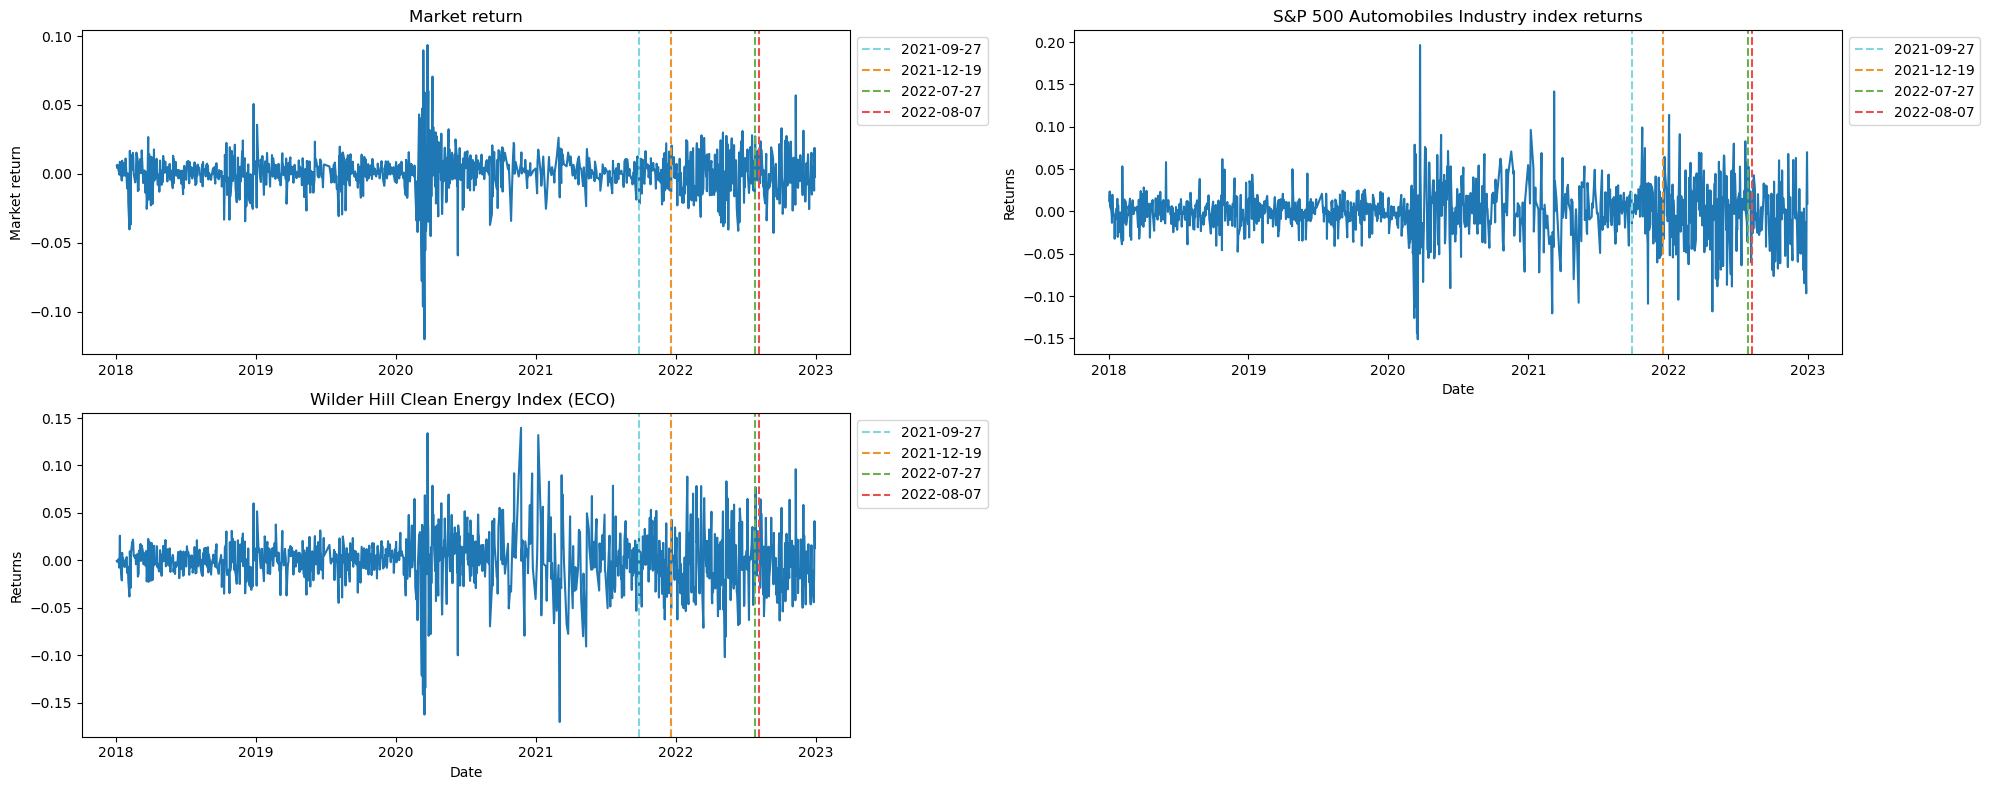

In [18]:
fig, axs = plt.subplots(2,2, figsize=(20, 8))

# Market return
axs[0,0].plot(DF2["Date"], DF2["Mkt"])
axs[0,0].set_title('Market return')
axs[0,0].set_ylabel('Market return')

axs[0,0].axvline(x = pd.to_datetime("2021-09-27"), linestyle= "--", color = "#7ed6df", label= "2021-09-27" )
axs[0,0].axvline(x = pd.to_datetime("2021-12-19"), linestyle= "--", color = "#f0932b", label= "2021-12-19" )
axs[0,0].axvline(x = pd.to_datetime("2022-07-27"), linestyle= "--", color = "#6ab04c", label= "2022-07-27" )
axs[0,0].axvline(x = pd.to_datetime("2022-08-07"), linestyle= "--", color = "#eb4d4b", label= "2022-08-07" )
axs[0,0].legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')



# S&P 500 Automobiles Industry index returns
axs[0,1].plot(DF2["Date"], DF2["Ret_^SP500-251020"])
axs[0,1].set_title('S&P 500 Automobiles Industry index returns')
axs[0,1].set_xlabel('Date')
axs[0,1].set_ylabel('Returns')

axs[0,1].axvline(x = pd.to_datetime("2021-09-27"), linestyle= "--", color = "#7ed6df", label= "2021-09-27" )
axs[0,1].axvline(x = pd.to_datetime("2021-12-19"), linestyle= "--", color = "#f0932b", label= "2021-12-19" )
axs[0,1].axvline(x = pd.to_datetime("2022-07-27"), linestyle= "--", color = "#6ab04c", label= "2022-07-27" )
axs[0,1].axvline(x = pd.to_datetime("2022-08-07"), linestyle= "--", color = "#eb4d4b", label= "2022-08-07" )
axs[0,1].legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')

# Wilder Hill Clean Energy Index (ECO) 
axs[1,0].plot(DF2["Date"], DF2["Ret_^ECO"])
axs[1,0].set_title('Wilder Hill Clean Energy Index (ECO) ')
axs[1,0].set_xlabel('Date')
axs[1,0].set_ylabel('Returns')

axs[1,0].axvline(x = pd.to_datetime("2021-09-27"), linestyle= "--", color = "#7ed6df", label= "2021-09-27" )
axs[1,0].axvline(x = pd.to_datetime("2021-12-19"), linestyle= "--", color = "#f0932b", label= "2021-12-19" )
axs[1,0].axvline(x = pd.to_datetime("2022-07-27"), linestyle= "--", color = "#6ab04c", label= "2022-07-27" )
axs[1,0].axvline(x = pd.to_datetime("2022-08-07"), linestyle= "--", color = "#eb4d4b", label= "2022-08-07" )
axs[1,0].legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')

axs[1, 1].axis('off')


fig.tight_layout()
plt.savefig('graph1.png')
plt.show()

In [19]:
DF2["Date"] < pd.to_datetime("2021-08-27")

1        True
2        True
3        True
4        True
5        True
        ...  
1145    False
1146    False
1147    False
1148    False
1149    False
Name: Date, Length: 1149, dtype: bool

Now, I will make a zoom on the days arround the four events:

In [20]:
mask1 = DF2["Date"] > pd.to_datetime("2021-08-27")
mask2 = DF2["Date"] <  pd.to_datetime("2022-09-07")
DF_zoom = DF2[mask1 & mask2]

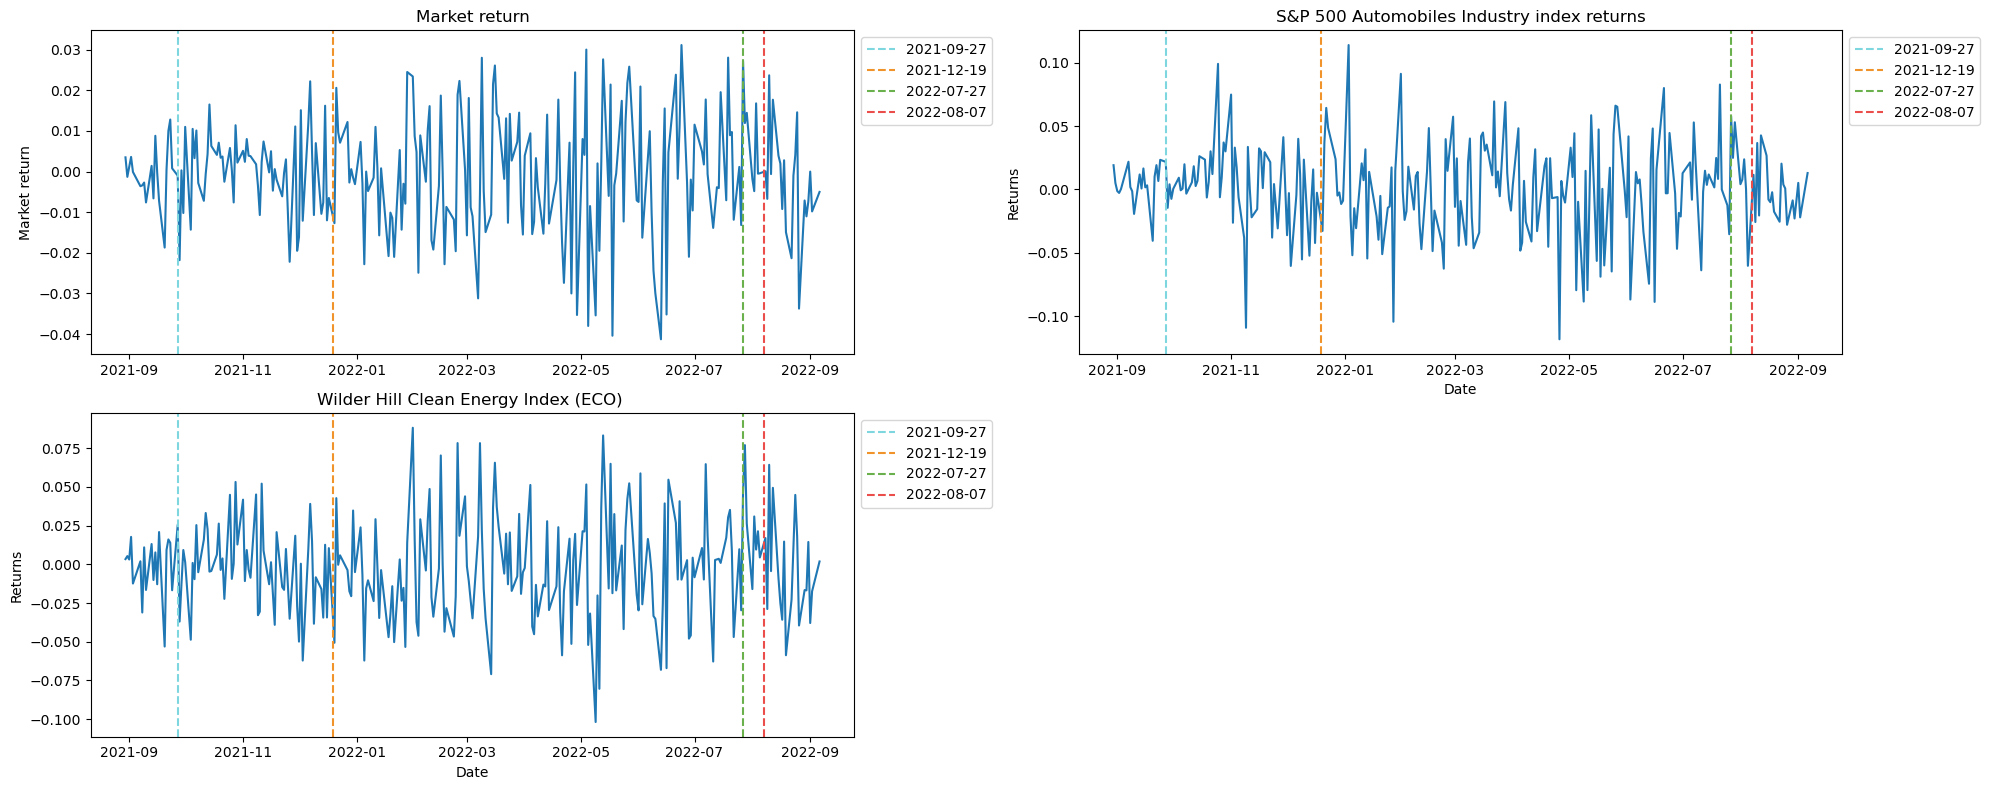

In [21]:
fig, axs = plt.subplots(2,2, figsize=(20, 8))

# Market return
axs[0,0].plot(DF_zoom["Date"], DF_zoom["Mkt"])
axs[0,0].set_title('Market return')
axs[0,0].set_ylabel('Market return')

axs[0,0].axvline(x = pd.to_datetime("2021-09-27"), linestyle= "--", color = "#7ed6df", label= "2021-09-27" )
axs[0,0].axvline(x = pd.to_datetime("2021-12-19"), linestyle= "--", color = "#f0932b", label= "2021-12-19" )
axs[0,0].axvline(x = pd.to_datetime("2022-07-27"), linestyle= "--", color = "#6ab04c", label= "2022-07-27" )
axs[0,0].axvline(x = pd.to_datetime("2022-08-07"), linestyle= "--", color = "#eb4d4b", label= "2022-08-07" )
axs[0,0].legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')



# S&P 500 Automobiles Industry index returns
axs[0,1].plot(DF_zoom["Date"], DF_zoom["Ret_^SP500-251020"])
axs[0,1].set_title('S&P 500 Automobiles Industry index returns')
axs[0,1].set_xlabel('Date')
axs[0,1].set_ylabel('Returns')

axs[0,1].axvline(x = pd.to_datetime("2021-09-27"), linestyle= "--", color = "#7ed6df", label= "2021-09-27" )
axs[0,1].axvline(x = pd.to_datetime("2021-12-19"), linestyle= "--", color = "#f0932b", label= "2021-12-19" )
axs[0,1].axvline(x = pd.to_datetime("2022-07-27"), linestyle= "--", color = "#6ab04c", label= "2022-07-27" )
axs[0,1].axvline(x = pd.to_datetime("2022-08-07"), linestyle= "--", color = "#eb4d4b", label= "2022-08-07" )
axs[0,1].legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')

# Wilder Hill Clean Energy Index (ECO) 
axs[1,0].plot(DF_zoom["Date"], DF_zoom["Ret_^ECO"])
axs[1,0].set_title('Wilder Hill Clean Energy Index (ECO) ')
axs[1,0].set_xlabel('Date')
axs[1,0].set_ylabel('Returns')

axs[1,0].axvline(x = pd.to_datetime("2021-09-27"), linestyle= "--", color = "#7ed6df", label= "2021-09-27" )
axs[1,0].axvline(x = pd.to_datetime("2021-12-19"), linestyle= "--", color = "#f0932b", label= "2021-12-19" )
axs[1,0].axvline(x = pd.to_datetime("2022-07-27"), linestyle= "--", color = "#6ab04c", label= "2022-07-27" )
axs[1,0].axvline(x = pd.to_datetime("2022-08-07"), linestyle= "--", color = "#eb4d4b", label= "2022-08-07" )
axs[1,0].legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')

axs[1, 1].axis('off')


fig.tight_layout()
plt.savefig('graph1.png')
plt.show()

In [22]:
DF2.describe().to_csv('summary_stats.csv')
DF2.describe()

,Date,^ECO,Mkt-RF,RF,Mkt,^SP500-251020,sept_23_to_sept_29_2021,dec_16_to_dec_22_2021,jul_25_to_jul_29_2022,aug_04_to_aug_10_2022,ln_^ECO,Ret_^ECO,Ret_^SP500-251020
count,1149,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000
mean,2020-06-15 22:52:19.425587456,95.695213,0.035970,0.004929,0.000409,4.536407,0.004352,0.004352,0.004352,0.004352,4.444505,0.000346,-0.000606
min,2018-01-03 00:00:00,41.980000,-12.000000,0.000000,-0.119940,3.717224,0.000000,0.000000,0.000000,0.000000,3.737193,-0.170208,-0.151145
25%,2019-02-26 00:00:00,55.250000,-0.540000,0.000000,-0.005300,4.465103,0.000000,0.000000,0.000000,0.000000,4.011868,-0.013243,-0.013241
50%,2020-04-28 00:00:00,77.320000,0.080000,0.006000,0.000870,4.541378,0.000000,0.000000,0.000000,0.000000,4.347953,0.000957,0.000649
75%,2021-11-09 00:00:00,120.660000,0.740000,0.008000,0.007470,4.646984,0.000000,0.000000,0.000000,0.000000,4.792977,0.013916,0.012828
max,2022-12-30 00:00:00,281.440000,9.340000,0.016000,0.093460,5.114995,1.000000,1.000000,1.000000,1.000000,5.639919,0.139728,0.196597
std,NaN,49.340981,1.453084,0.004309,0.014529,0.234584,0.065852,0.065852,0.065852,0.065852,0.470161,0.028584,0.029793


Now, I obtain the Kurtosis for the variables

In [23]:
var= ["Ret_^SP500-251020", "Ret_^ECO", "Mkt"]

In [24]:
print("Kurtosis")
for x in var:
    print( x +": " + str(DF2[x].kurt()))

Kurtosis
Ret_^SP500-251020: 4.594440618612076
Ret_^ECO: 4.789605337914164
Mkt: 10.344056885480876


Now, I calculate the Skewness:

In [25]:
print("Skewness")
for x in var:
    print( x +": " + str(DF2[x].skew()))

Skewness
Ret_^SP500-251020: -0.1210109782836565
Ret_^ECO: -0.2806404402182924
Mkt: -0.5450368977824288


In [26]:
pd.options.display.precision = 4

In [27]:
norm = pd.DataFrame()
norm["Mkt"] = stats.jarque_bera(DF2["Mkt"])
norm["Ret_^ECO"] =stats.jarque_bera(DF2["Mkt"])
norm["Ret_^SP500-251020"] =stats.jarque_bera(DF2["Mkt"])

In [28]:
print(stats.jarque_bera(DF2["Mkt"]))
print(stats.jarque_bera(DF2["Mkt"]))
print(stats.jarque_bera(DF2["Mkt"]))

norm = pd.DataFrame()
norm["Mkt"] = stats.jarque_bera(DF2["Mkt"])
norm["Ret_^ECO"] =stats.jarque_bera(DF2["Mkt"])
norm["Ret_^SP500-251020"] =stats.jarque_bera(DF2["Mkt"])

norm.to_csv("jarque_bera.csv")

SignificanceResult(statistic=5129.7653360888335, pvalue=0.0)
SignificanceResult(statistic=5129.7653360888335, pvalue=0.0)
SignificanceResult(statistic=5129.7653360888335, pvalue=0.0)


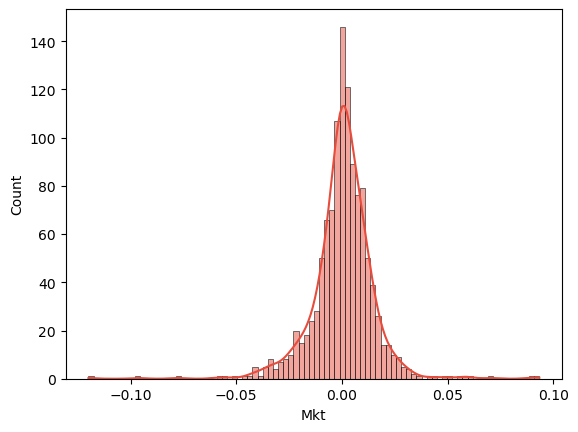

In [29]:
sns.histplot(DF2["Mkt"], kde = True, color = "#e74c3c")

plt.savefig('graph2.png')

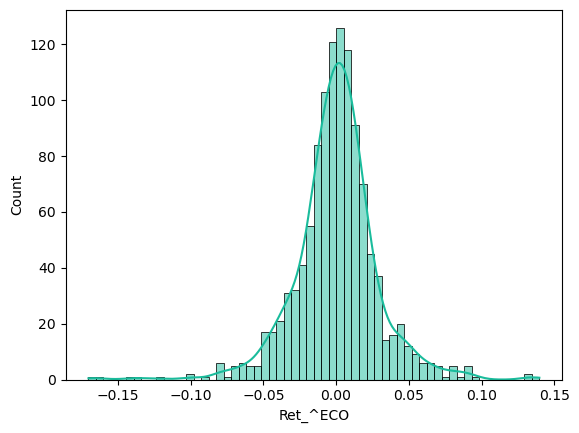

In [30]:
sns.histplot(DF2["Ret_^ECO"], kde = True, color= "#1abc9c")
plt.savefig('graph3.png')

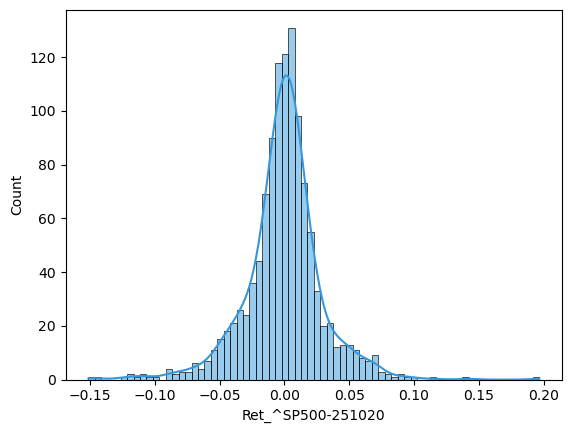

In [31]:
sns.histplot(DF2["Ret_^SP500-251020"], kde = True, color = "#3498db")
plt.savefig('graph4.png')

Finally,I obtain the correlation matrix between the variables

In [32]:
corr =DF2[var].corr()

corr.to_csv('corr.csv')

corr

,Ret_^SP500-251020,Ret_^ECO,Mkt
Ret_^SP500-251020,1.0000,0.6850,0.6477
Ret_^ECO,0.6850,1.0000,0.7159
Mkt,0.6477,0.7159,1.0000


# 4. Mean adjusted return model for market portfolio<a id="chapter4"></a>

In [33]:
DF2

,Date,^ECO,Mkt-RF,RF,Mkt,^SP500-251020,sept_23_to_sept_29_2021,dec_16_to_dec_22_2021,jul_25_to_jul_29_2022,aug_04_to_aug_10_2022,ln_^ECO,Ret_^ECO,Ret_^SP500-251020
1,2018-01-03,53.88,0.59,0.006,0.0060,4.7362,0,0,0,0,3.9868,-0.0006,0.0122
2,2018-01-04,53.80,0.42,0.006,0.0043,4.7597,0,0,0,0,3.9853,-0.0015,0.0235
3,2018-01-05,53.79,0.66,0.006,0.0067,4.7657,0,0,0,0,3.9851,-0.0002,0.0060
4,2018-01-08,53.87,0.19,0.006,0.0020,4.7671,0,0,0,0,3.9866,0.0015,0.0014
5,2018-01-09,53.47,0.15,0.006,0.0016,4.7640,0,0,0,0,3.9791,-0.0075,-0.0032
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,2022-12-23,80.47,0.51,0.016,0.0053,4.0261,0,0,0,0,4.3879,-0.0104,-0.0124
1146,2022-12-27,77.00,-0.51,0.016,-0.0049,3.9293,0,0,0,0,4.3438,-0.0441,-0.0968
1147,2022-12-28,76.02,-1.23,0.016,-0.0121,3.9487,0,0,0,0,4.3310,-0.0128,0.0195
1148,2022-12-29,79.23,1.87,0.016,0.0189,4.0187,0,0,0,0,4.3724,0.0414,0.0700


In [34]:
x = DF2[["sept_23_to_sept_29_2021", "dec_16_to_dec_22_2021", "jul_25_to_jul_29_2022", "aug_04_to_aug_10_2022"]]
y = DF2['Mkt']

x = sm.add_constant(x)


result = sm.OLS(y, x).fit()
print(result.summary())

csv_data =result.summary().as_csv()

with open('result1.csv', 'w') as f:
    f.write(csv_data)

                            OLS Regression Results                            
Dep. Variable:                    Mkt   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.4486
Date:                Tue, 27 Feb 2024   Prob (F-statistic):              0.773
Time:                        20:03:19   Log-Likelihood:                 3233.1
No. Observations:                1149   AIC:                            -6456.
Df Residuals:                    1144   BIC:                            -6431.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

# 5. Market Return model after for ^ECO index and S&P 500 Automotive industry group <a id="chapter5"></a>

First I analyze the events for the clean energy sector with the ^ECO index

In [35]:
x = DF2[["Mkt", "sept_23_to_sept_29_2021", "dec_16_to_dec_22_2021", "jul_25_to_jul_29_2022", "aug_04_to_aug_10_2022"]]
y = DF2['Ret_^ECO']

x = sm.add_constant(x)


result = sm.OLS(y, x).fit()
print(result.summary())

csv_data =result.summary().as_csv()

with open('result2.csv', 'w') as f:
    f.write(csv_data)

                            OLS Regression Results                            
Dep. Variable:               Ret_^ECO   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     242.3
Date:                Tue, 27 Feb 2024   Prob (F-statistic):          1.65e-176
Time:                        20:03:19   Log-Likelihood:                 2869.9
No. Observations:                1149   AIC:                            -5728.
Df Residuals:                    1143   BIC:                            -5698.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [36]:
DF2["Events"] = "Rest of the days"

mask1 = DF2["sept_23_to_sept_29_2021"] == 1
mask2 =DF2["dec_16_to_dec_22_2021"] == 1
mask3 =DF2["jul_25_to_jul_29_2022"] == 1
mask4 =DF2["aug_04_to_aug_10_2022"] == 1

MASK = (mask1 | mask2 | mask3 | mask4)

DF2.loc[MASK, 'Events'] = "Days around events"

In [37]:
DF2["Events"].value_counts()

Events
Rest of the days      1129
Days around events      20
Name: count, dtype: int64

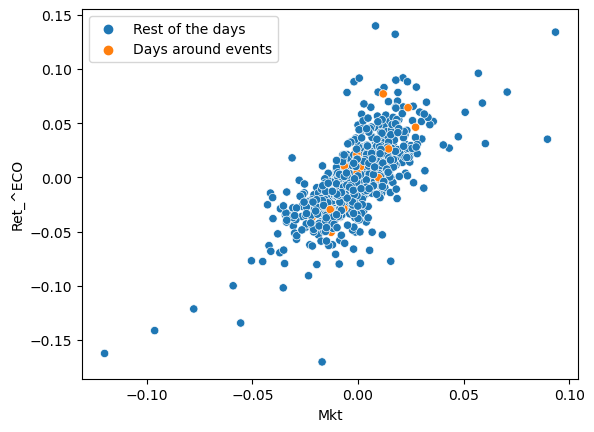

In [38]:
sns.scatterplot(x=DF2["Mkt"], y= DF2["Ret_^ECO"], data=DF2, hue=DF2["Events"])
plt.legend()

plt.savefig('graph6.png')

Now, I evaluate the case of the automotive industry with the S&P 500 Automobiles Industry index

In [39]:
x = DF2[["Mkt", "sept_23_to_sept_29_2021", "dec_16_to_dec_22_2021", "jul_25_to_jul_29_2022", "aug_04_to_aug_10_2022"]]
y = DF2["Ret_^SP500-251020"]

x = sm.add_constant(x)


result = sm.OLS(y, x).fit()
print(result.summary())

csv_data =result.summary().as_csv()
with open('result3.csv', 'w') as f:
    f.write(csv_data)

                            OLS Regression Results                            
Dep. Variable:      Ret_^SP500-251020   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     166.4
Date:                Tue, 27 Feb 2024   Prob (F-statistic):          5.01e-133
Time:                        20:03:19   Log-Likelihood:                 2721.4
No. Observations:                1149   AIC:                            -5431.
Df Residuals:                    1143   BIC:                            -5400.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

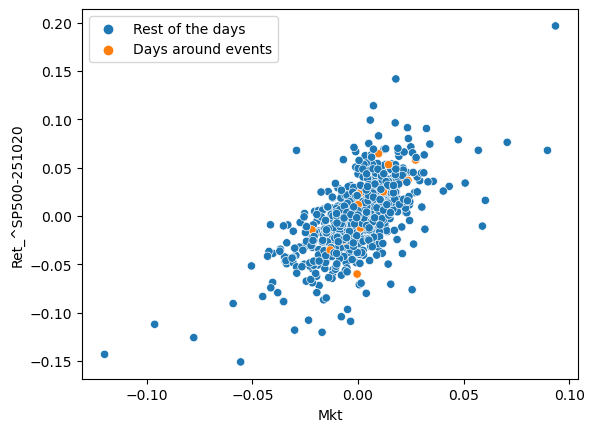

In [40]:
sns.scatterplot(x=DF2["Mkt"], y= DF2["Ret_^SP500-251020"], data=DF2, hue=DF2["Events"])
plt.legend()

plt.savefig('graph7.png')

In [41]:
start = dt.date(2017,12,31)
end = dt.date(2022,12,31)

tickers = ["BTC-USD", "^GSPC"]

In [42]:
yfin.pdr_override()
df = pd.DataFrame(pdr.get_data_yahoo(tickers, start, end)["Adj Close"])

[*********************100%%**********************]  2 of 2 completed


In [43]:
df.index = pd.DatetimeIndex(df.index).to_period('b')

In [44]:
df

,BTC-USD,^GSPC
Date,,
2018-01-01,14156.4004,NaN
2018-01-01,13657.2002,NaN
2018-01-02,14982.0996,2695.8101
2018-01-03,15201.0000,2713.0601
2018-01-04,15599.2002,2723.9900
...,...,...
2022-12-26,16919.8047,NaN
2022-12-27,16717.1738,3829.2500
2022-12-28,16552.5723,3783.2200


TypeError: Invalid object type at position 0

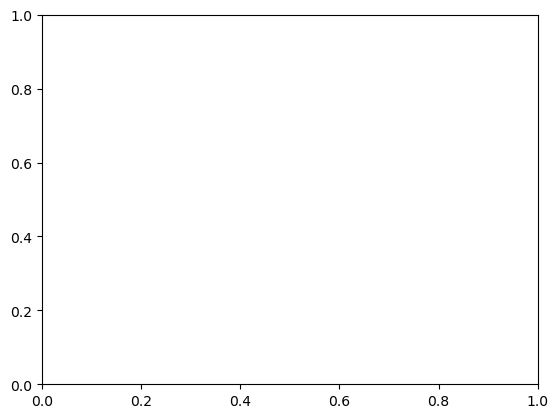

In [51]:
sns.lineplot(df["BTC-USD"])

TypeError: Invalid object type at position 0

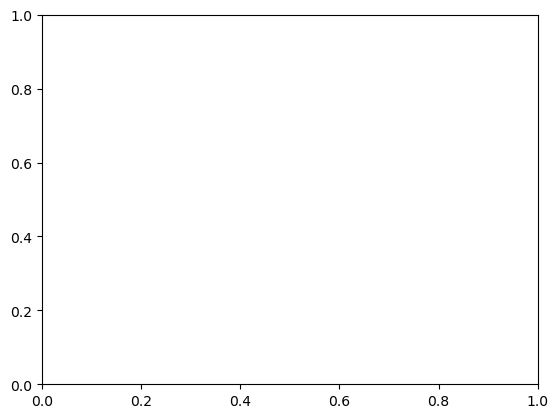

In [50]:
sns.lineplot(df["BTC-USD"])


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

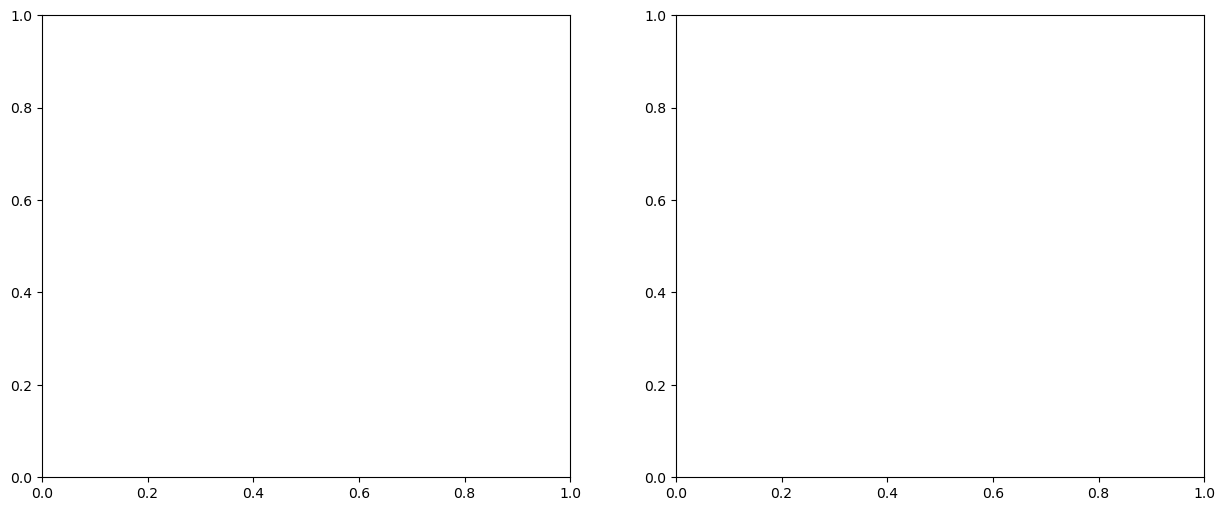

In [48]:
fig, axs = plt.subplots(1,2, figsize=(15, 6))


sns.lineplot(df["BTC-USD"], ax=axs[0,0])

